In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
# Data Normalization [0, 1]

(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
test_images  = test_images / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_data1 = model.fit(train_images, train_labels, 
                    validation_data=(test_images, test_labels), 
                    batch_size=1024, epochs=50, verbose=0)

In [ ]:
# Data Normalization [-1, 1]

(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images = train_images / 127.5 - 1
test_images  = test_images / 127.5 - 1

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_data2 = model.fit(train_images, train_labels, 
                    validation_data=(test_images, test_labels), 
                    batch_size=1024, epochs=50, verbose=0)

In [ ]:
# Data Z-Score Normalization
from sklearn.preprocessing import StandardScaler

(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images = StandardScaler().fit_transform(train_images.reshape(-1, 28*28))
test_images = StandardScaler().fit_transform(test_images.reshape(-1, 28*28))

model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_data3 = model.fit(train_images, train_labels, 
                    validation_data=(test_images, test_labels), 
                    batch_size=1024, epochs=50, verbose=0)

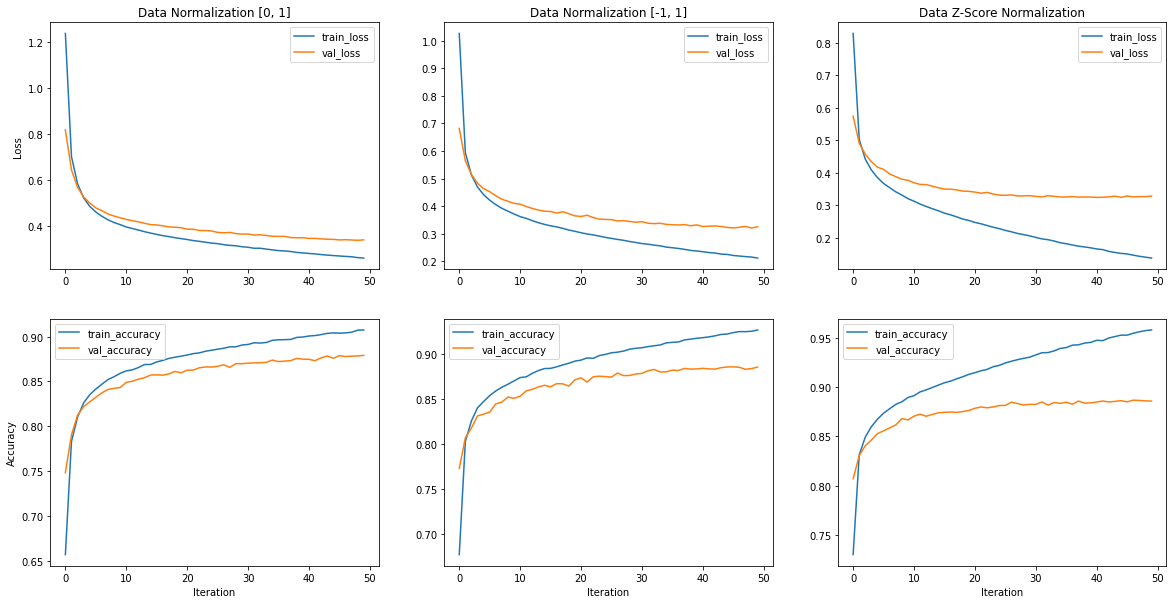

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

axs[0, 0].plot(history_data1.history['loss'], label = "train_loss")
axs[0, 0].plot(history_data1.history['val_loss'], label = "val_loss")
axs[0, 0].set_ylabel('Loss')
axs[0, 0].set_title('Data Normalization [0, 1]')
axs[0, 0].legend()

axs[0, 1].plot(history_data2.history['loss'], label = "train_loss")
axs[0, 1].plot(history_data2.history['val_loss'], label = "val_loss")
axs[0, 1].set_title('Data Normalization [-1, 1]')
axs[0, 1].legend()

axs[0, 2].plot(history_data3.history['loss'], label = "train_loss")
axs[0, 2].plot(history_data3.history['val_loss'], label = "val_loss")
axs[0, 2].set_title('Data Z-Score Normalization')
axs[0, 2].legend()

axs[1, 0].plot(history_data1.history['accuracy'], label = "train_accuracy")
axs[1, 0].plot(history_data1.history['val_accuracy'], label = "val_accuracy")
axs[1, 0].set_xlabel('Iteration')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()

axs[1, 1].plot(history_data2.history['accuracy'], label = "train_accuracy")
axs[1, 1].plot(history_data2.history['val_accuracy'], label = "val_accuracy")
axs[1, 1].set_xlabel('Iteration')
axs[1, 1].legend()

axs[1, 2].plot(history_data3.history['accuracy'], label = "train_accuracy")
axs[1, 2].plot(history_data3.history['val_accuracy'], label = "val_accuracy")
axs[1, 2].set_xlabel('Iteration')
axs[1, 2].legend()